In [ ]:
import pandas as pd #Se importa la librería pandas
import numpy as np #Se importa la librería numpy
import matplotlib.pyplot as plt #Se importa la librería matplot
import seaborn as sns #Se importa la librería seaborn para realizar gráficas

In [ ]:
transito = pd.read_json('https://www.datos.gov.co/resource/7cci-nqqb.json?$limit=100000') #Se carga la base de datos
transito #Se muestra la base de datos

,orden,fecha,a_o,mes,d_a,gravedad,peaton,automovil,campero,camioneta,...,volqueta,moto,bicicleta,otro,barrio,hora,entidad,nombrecomuna,propietario_de_veh_culo,diurnio_nocturno
0,1,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,0,1,0,0,...,0,0,0,0,Mutis,12:15:00,AGENTES DTB,17. MUTIS,Particular,Diurno
1,2,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Regaderos Norte,14:00:00,AGENTES DTB,02. NORORIENTAL,Empresa,Diurno
2,3,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,0,0,1,...,0,0,0,0,Cabecera Del Llano,12:00:00,AGENTES DTB,12. CABECERA DEL LLANO,Particular,Diurno
3,4,01/01/2012,2012,01. Enero,07. Domingo,Solo daños,0,1,0,1,...,0,0,0,0,Norte Bajo,18:30:00,AGENTES DTB,03. SAN FRANCISCO,Empresa,Nocturno
4,5,01/01/2012,2012,01. Enero,07. Domingo,Con heridos,1,0,0,0,...,0,1,0,0,Dangond,00:30:00,AGENTES DTB,11. SUR,Particular,Nocturno
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39188,39189,12/04/2023,2023,04. Abril,03. Miercoles,Con Muertos,0,1,0,0,...,0,1,0,0,La Concordia,21:00:00,AGENTES DTB,06. LA CONCORDIA,Empresa,Nocturno
39189,39190,22/09/2023,2023,09. Septiembre,05. Viernes,Con Muertos,0,0,0,0,...,0,1,0,0,Colorados,09:30:00,AGENTES DTB,01. NORTE,Particular,Diurno
39190,39191,23/09/2023,2023,09. Septiembre,06. Sabado,Con Muertos,0,0,0,0,...,0,1,0,0,Morrorico,01:00:00,AGENTES DTB,14. MORRORICO,Particular,Nocturno
39191,39192,24/09/2023,2023,09. Septiembre,07. Domingo,Con Muertos,0,1,0,0,...,0,1,0,0,NO DISPONIBLE,02:15:00,AGENTES DTB,NO DISPONIBLE,Particular,Nocturno


In [ ]:
transito.columns

Index(['orden', 'fecha', 'a_o', 'mes', 'd_a', 'gravedad', 'peaton',
       'automovil', 'campero', 'camioneta', 'micro', 'buseta', 'bus', 'camion',
       'volqueta', 'moto', 'bicicleta', 'otro', 'barrio', 'hora', 'entidad',
       'nombrecomuna', 'propietario_de_veh_culo', 'diurnio_nocturno'],
      dtype='object')

In [ ]:
transito.shape #Muestra la csntidad de datos

(39193, 24)

In [ ]:
transito['mes'].unique() #Indica los meses que estan en la base de datos y no se estan repitiendo

array(['01. Enero', '02. Febrero', '03. Marzo', '04. Abril', '05. Mayo',
       '06. Junio', '07. Julio', '08. Agosto', '09. Septiembre',
       '10. Octubre', '11. Noviembre', '12. Diciembre'], dtype=object)

# **El mes con mayor número de accidentes en general durante el año:**

In [ ]:
transito['total_accidentes'] = transito[['peaton', 'automovil', 'campero', 'camioneta', 'micro', 'buseta', 'bus', 'camion', 'moto', 'bicicleta', 'otro']].sum(axis=1) #Se realiza la suma de los accidentes registrados en cada fecha sin discriminar actores involucrados
accidentes_mes = transito.groupby('mes')['total_accidentes'].sum().reset_index() #Se realiza la sumatoria de los datos separando por mes
accidentes_mes.max()

,0
mes,12. Diciembre
total_accidentes,6948


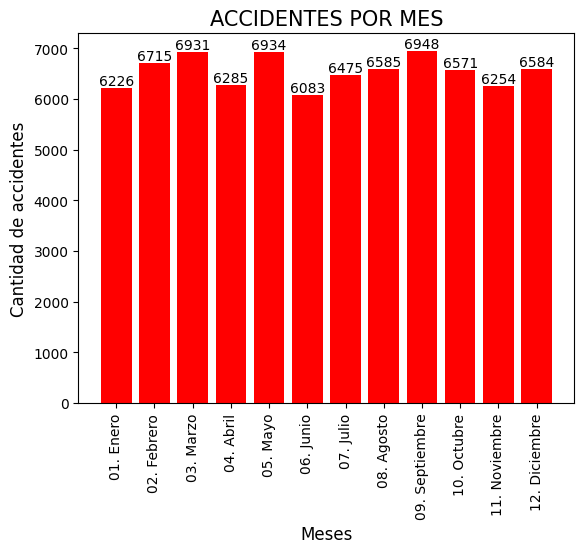

In [ ]:
plt.bar(accidentes_mes['mes'], accidentes_mes['total_accidentes'], color='red')  # Gráfico de barras
plt.title("ACCIDENTES POR MES", fontsize=15)  # Título de la gráfica
plt.xlabel("Meses", fontsize=12)  # Título del eje X
plt.ylabel("Cantidad de accidentes", fontsize=12)  # Título del eje Y
plt.xticks(rotation=90)  # Rotación de las etiquetas del eje X
# Añadir etiquetas encima de las barras
for i, altura in enumerate(accidentes_mes['total_accidentes']):
    plt.annotate(str(altura), xy=(i, altura), ha='center', va='bottom')
plt.show()  # Muestra la gráfica

# **La cantidad de heridos, daños materiales, y fallecidos en los accidentes.**


In [ ]:
transito['gravedad'].value_counts() #Realiza un conteo de los valores

,count
gravedad,
Solo daños,19602
Con heridos,18982
Con muertos,503
Con Muertos,106


In [ ]:
# Normalizar el texto de la columna 'gravedad' y contar las ocurrencias
gravedad_conteo = transito['gravedad'].replace('Con muertos', 'Con Muertos').value_counts().reset_index()
gravedad_conteo.columns = ['Gravedad', 'Cantidad']  # Renombrar columnas
gravedad_conteo  # Mostrar el DataFrame

,Gravedad,Cantidad
0,Solo daños,19602
1,Con heridos,18982
2,Con Muertos,609


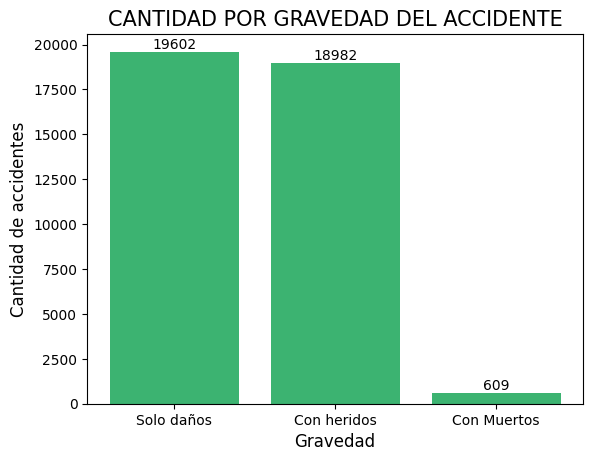

In [ ]:
plt.bar(gravedad_conteo["Gravedad"], gravedad_conteo["Cantidad"], color='mediumseagreen')  # Gráfico de barras
plt.title("CANTIDAD POR GRAVEDAD DEL ACCIDENTE", fontsize=15)  # Título de la gráfica
plt.xlabel("Gravedad", fontsize=12)  # Título del eje X
plt.ylabel("Cantidad de accidentes", fontsize=12)  # Título del eje Y

# Añadir etiquetas encima de las barras
for i, altura in enumerate(gravedad_conteo["Cantidad"]):
    plt.annotate(str(altura), xy=(i, altura), ha='center', va='bottom')

plt.show()  # Muestra la gráfica

# **La influencia de la pandemia en los accidentes de tránsito.**

In [ ]:
transito["fecha"] = pd.to_datetime(transito['fecha'], format = '%d/%m/%Y') #Se cambia el formato de fecha
#Se crea una tabla dinámica para tomar los valores totales de mes y año, y los valores no definidos se llene con 0
accidentes_año = transito.pivot_table(index='a_o', columns=['mes'], aggfunc='size').fillna(0)
accidentes_año #Se muestran los datos

mes,01. Enero,02. Febrero,03. Marzo,04. Abril,05. Mayo,06. Junio,07. Julio,08. Agosto,09. Septiembre,10. Octubre,11. Noviembre,12. Diciembre
a_o,,,,,,,,,,,,
2012,317.0,376.0,394.0,342.0,352.0,321.0,334.0,384.0,382.0,389.0,357.0,394.0
2013,314.0,308.0,354.0,351.0,367.0,304.0,344.0,333.0,368.0,354.0,317.0,340.0
2014,289.0,312.0,347.0,275.0,302.0,268.0,298.0,345.0,320.0,344.0,291.0,333.0
2015,281.0,326.0,303.0,311.0,338.0,291.0,315.0,321.0,348.0,324.0,314.0,293.0
2016,278.0,342.0,316.0,360.0,315.0,294.0,284.0,304.0,315.0,314.0,304.0,313.0
2017,246.0,283.0,295.0,296.0,380.0,314.0,319.0,336.0,361.0,329.0,323.0,330.0
2018,291.0,306.0,323.0,325.0,351.0,316.0,323.0,313.0,339.0,318.0,351.0,361.0
2019,281.0,296.0,347.0,273.0,333.0,290.0,334.0,302.0,338.0,319.0,305.0,298.0
2020,285.0,296.0,203.0,81.0,123.0,120.0,159.0,165.0,179.0,236.0,193.0,221.0


<Figure size 1000x600 with 0 Axes>

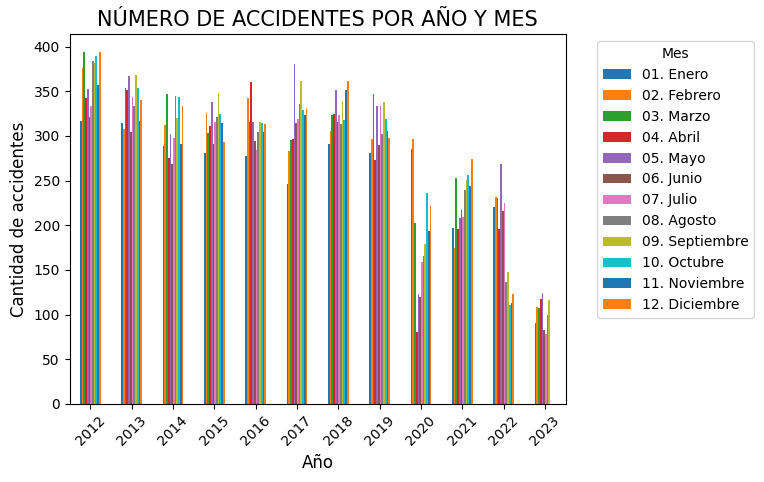

In [ ]:
plt.figure(figsize=(10, 6))  # Crear la figura con el tamaño especificado
# Graficar el DataFrame con barras no apiladas en el eje actual
accidentes_año.plot(kind='bar', stacked=False)
# Configurar etiquetas y título de los ejes
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de accidentes', fontsize=12)
plt.title('NÚMERO DE ACCIDENTES POR AÑO Y MES', fontsize=15)
# Configurar la leyenda fuera del gráfico
plt.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')
# Configurar la rotación de las etiquetas del eje X
plt.xticks(rotation=45)
plt.show()  # Mostrar la gráfica

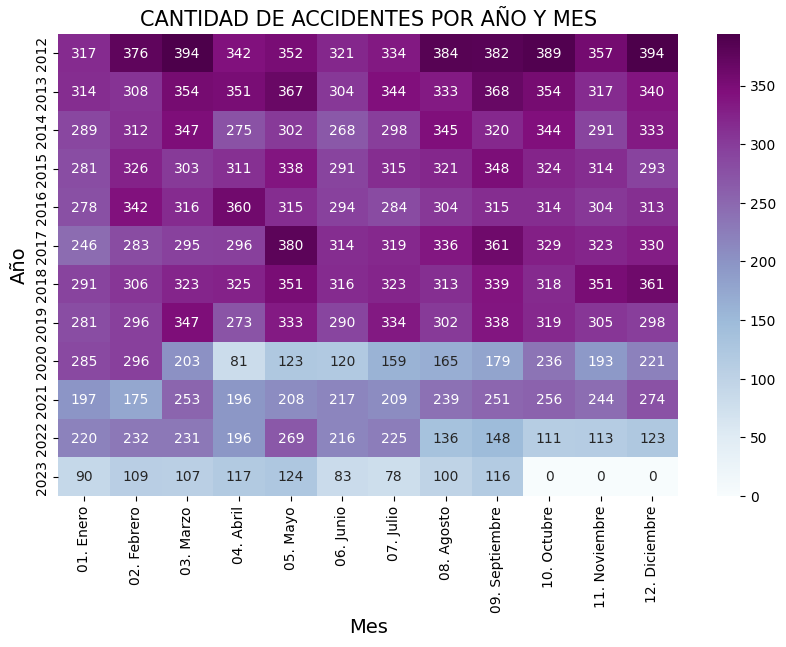

In [ ]:
plt.figure(figsize=(10, 6))  # Crear la figura con el tamaño especificado
# Crear el mapa de calor con etiquetas y formato
sns.heatmap(accidentes_año, cmap='BuPu', annot=True, fmt='g')
# Configurar etiquetas y título de los ejes
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Año', fontsize=14)
plt.title('CANTIDAD DE ACCIDENTES POR AÑO Y MES', fontsize=15)
# Mostrar el mapa de calor
plt.show()

# **El mes con el pico más alto de muertes registradas.**


In [ ]:
datos_filtro = ['mes','gravedad','total_accidentes'] #Se Indican cuales son los datos a filtrar
filtro_muertes = transito[datos_filtro] #Se filtran en la base de datos
muertes_mes = filtro_muertes[filtro_muertes["gravedad"] == "Con Muertos"] #En la base de datos ya filtrada se buscan únicamente los datos que tengan muertos
cantidad_muertes = muertes_mes.groupby('mes')['total_accidentes'].sum().reset_index() #Se realiza la sumatoria de los datos separando por mes
cantidad_muertes.max() #Se nuestra el valor mayor de accidentes con muertes registrados

,0
mes,12. Diciembre
total_accidentes,25


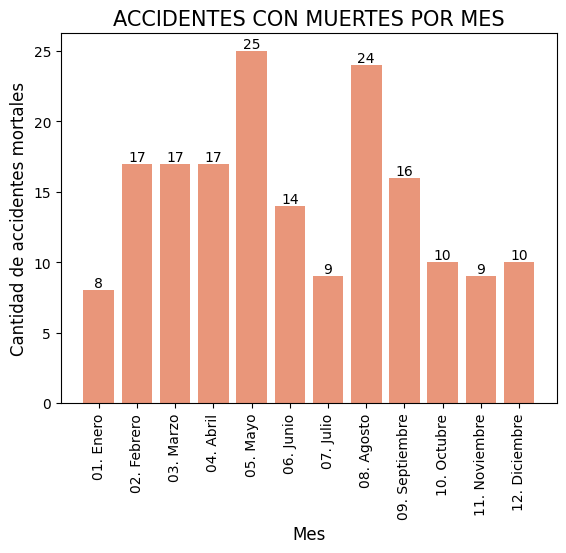

In [ ]:
# Crear el gráfico de barras
plt.bar(cantidad_muertes['mes'], cantidad_muertes['total_accidentes'], color='darksalmon')
# Añadir etiquetas encima de las barras
for i, altura in enumerate(cantidad_muertes['total_accidentes']):
    plt.annotate(str(altura), xy=(i, altura), ha='center', va='bottom')
# Configurar etiquetas y título de los ejes
plt.title("ACCIDENTES CON MUERTES POR MES", fontsize=15)
plt.xlabel("Mes", fontsize=12)
plt.ylabel("Cantidad de accidentes mortales", fontsize=12)
# Rotación de etiquetas del eje X
plt.xticks(rotation=90)
# Mostrar la gráfica
plt.show()

# **La peligrosidad de los accidentes entre el día y la noche.**



In [ ]:
horario = ['diurnio_nocturno', 'total_accidentes'] #Se Indican cuales son los datos a filtrar
horario_filtro = transito[horario] #Se filtran en la base de datos
mayor_peligro = horario_filtro.groupby('diurnio_nocturno')['total_accidentes'].sum().reset_index()
mayor_peligro #Se muestran los datos

,diurnio_nocturno,total_accidentes
0,Diurno,55691
1,Nocturno,22900


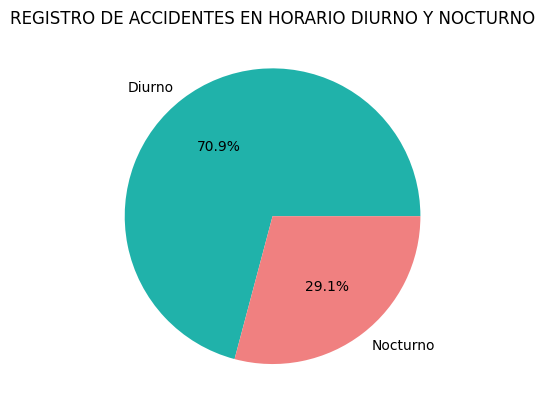

In [ ]:
# Crear el gráfico de torta
plt.pie(mayor_peligro["total_accidentes"], labels=mayor_peligro["diurnio_nocturno"], autopct='%1.1f%%', colors=['lightseagreen', 'lightcoral'])
# Configurar el título de la gráfica
plt.title("REGISTRO DE ACCIDENTES EN HORARIO DIURNO Y NOCTURNO", fontsize=12)
# Mostrar la gráfica
plt.show()

# **Comparar los accidentes ocurridos en diciembre de 2023 con los de junio de 2022.**

In [ ]:
filtro_comparacion = ['a_o','mes','total_accidentes'] #Se indican cuales son los datos a filtrar
filtro_comparacion_accidentes = transito[filtro_comparacion] #Se filtran en la base de datos
#Se realiza la sumatoria de los datos separando por año y mes
accidentes_agrupados = filtro_comparacion_accidentes.groupby(['a_o', 'mes'])['total_accidentes'].sum().reset_index()
accidentes_agrupados #Se muestran los datos

,a_o,mes,total_accidentes
0,2012,01. Enero,627
1,2012,02. Febrero,737
2,2012,03. Marzo,790
3,2012,04. Abril,688
4,2012,05. Mayo,685
...,...,...,...
136,2023,05. Mayo,252
137,2023,06. Junio,168
138,2023,07. Julio,158
139,2023,08. Agosto,206


In [ ]:
#Filtra las filas correspondientes a junio de 2022
datos_junio_2022 = accidentes_agrupados[(accidentes_agrupados['a_o'] == 2022) & (accidentes_agrupados['mes'] == '06. Junio')]
#Filtra las filas correspondientes a diciembre de 2022
datos_diciembre_2022 = accidentes_agrupados[(accidentes_agrupados['a_o'] == 2022) & (accidentes_agrupados['mes'] == '12. Diciembre')]
datos_diciembre_junio_2022 = pd.concat([datos_junio_2022, datos_diciembre_2022]) #Se concatenan los datos para que queden en la misma lista
datos_diciembre_junio_2022 #Se muestran los datos

,a_o,mes,total_accidentes
125,2022,06. Junio,433
131,2022,12. Diciembre,244


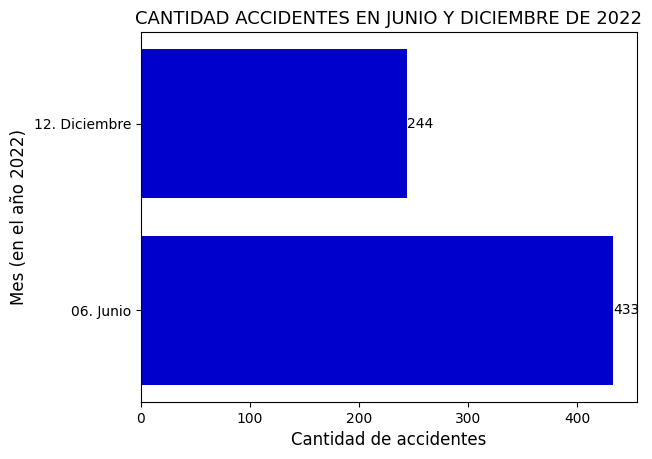

In [ ]:
# Crear el gráfico de barras horizontal
plt.barh(datos_diciembre_junio_2022["mes"], datos_diciembre_junio_2022["total_accidentes"], color='mediumblue')

# Añadir etiquetas al final de las barras
for i, altura in enumerate(datos_diciembre_junio_2022["total_accidentes"]):
    plt.annotate(str(altura), xy=(altura, i), ha='left', va='center')

# Configurar etiquetas y título de los ejes
plt.title("CANTIDAD ACCIDENTES EN JUNIO Y DICIEMBRE DE 2022", fontsize=13)
plt.xlabel("Cantidad de accidentes", fontsize=12)
plt.ylabel("Mes (en el año 2022)", fontsize=12)

# Mostrar la gráfica
plt.show()


# **Una comparación de todos los meses de diciembre a lo largo de los años.**

In [ ]:
accidentes_diciembre = transito.query("mes == '12. Diciembre'").sort_values("mes") #Se toma un intervalo de fechas
group_dic = accidentes_diciembre.groupby('a_o')['total_accidentes'].sum().reset_index()
group_dic #Se muestran los datos

,a_o,total_accidentes
0,2012,775
1,2013,679
2,2014,688
3,2015,594
4,2016,629
5,2017,658
6,2018,723
7,2019,595
8,2020,448
9,2021,551


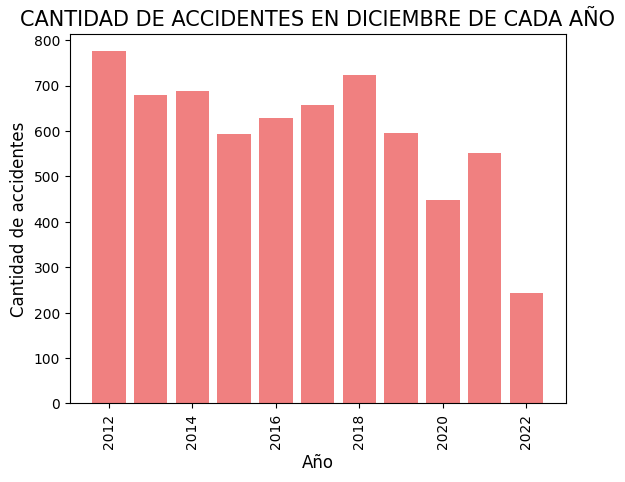

In [ ]:
# Crear el gráfico de barras
plt.bar(group_dic['a_o'], group_dic['total_accidentes'], color='lightcoral')
# Añadir etiquetas encima de las barras
for i, altura in enumerate(group_dic['total_accidentes']):
    plt.annotate(str(altura), xy=(i, altura), ha='center', va='bottom')
# Configurar etiquetas y título de los ejes
plt.title("CANTIDAD DE ACCIDENTES EN DICIEMBRE DE CADA AÑO", fontsize=15)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de accidentes", fontsize=12)
# Rotación de etiquetas del eje X
plt.xticks(rotation=90)
# Mostrar la gráfica
plt.show()

# **El día con mayor cantidad de accidentes.**


In [ ]:
filtro_dia = ['d_a','total_accidentes'] #Se indican cuales son los datos a filtrar
filtro_dia_accidentes = transito[filtro_dia] #Se filtran en la base de datos
accidentes_dia = filtro_dia_accidentes.groupby(['d_a'])['total_accidentes'].sum().reset_index() #Se realiza la sumatoria de los datos por día de la semana
accidentes_dia #Se muestran los datos

,d_a,total_accidentes
0,01. Lunes,10746
1,02. Martes,11764
2,03. Miercoles,11511
3,04. Jueves,11403
4,05. Viernes,11963
5,06. Sabado,13107
6,07. Domingo,8097


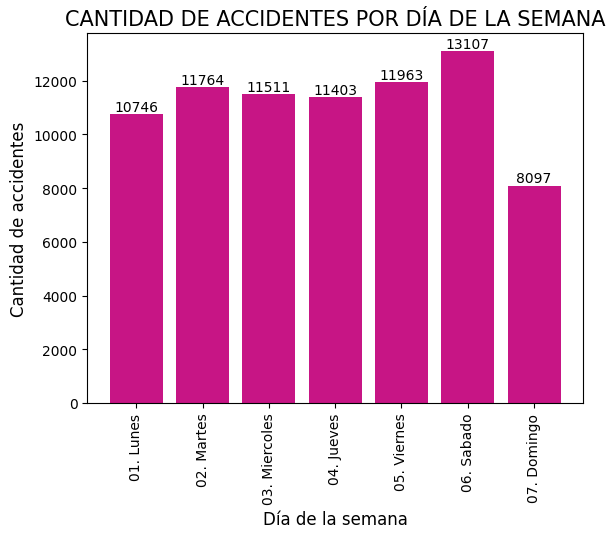

In [ ]:
# Crear el gráfico de barras
plt.bar(accidentes_dia['d_a'], accidentes_dia['total_accidentes'], color='mediumvioletred')
# Añadir etiquetas encima de las barras
for i, altura in enumerate(accidentes_dia['total_accidentes']):
    plt.annotate(str(altura), xy=(i, altura), ha='center', va='bottom')
# Configurar etiquetas y título de los ejes
plt.title("CANTIDAD DE ACCIDENTES POR DÍA DE LA SEMANA", fontsize=15)
plt.xlabel("Día de la semana", fontsize=12)
plt.ylabel("Cantidad de accidentes", fontsize=12)
# Rotación de etiquetas del eje X
plt.xticks(rotation=90)
# Mostrar la gráfica
plt.show()